In [36]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 

In [37]:
data=pd.read_csv('shampoo.csv')

### Convert String to Datetime

In [38]:
import datetime
from statsmodels.tsa.stattools import adfuller
def split(a):
    return(a.split('-'))

A=list(map(split,data['Month']))
A[0]
def sum_1(A):
    a=int(A[0])+2000
    A[0]=str(a)
    return(A[0]+'-'+A[1]+'-'+'01')
    
B=list(map(sum_1,A))
data['Month']=pd.DataFrame(B)

def to_time(d):
    dt=datetime.datetime.strptime(d,'%Y-%m-%d')
    return(dt)
data['Month']=pd.DataFrame(map(to_time,data['Month']))
data.set_index('Month',inplace=True)



## Staionnarize the data using log

In [39]:

A=data['Sales']-data['Sales'].shift(12)
adfuller(A.dropna())

(-0.04561553414249077,
 0.9545931714075298,
 6,
 17,
 {'1%': -3.889265672705068,
  '5%': -3.0543579727254224,
  '10%': -2.66698384083045},
 159.60811155993318)

(-4.757250863976687, 6.560733783487268e-05, 8, 15, {'1%': -3.9644434814814815, '5%': -3.0849081481481484, '10%': -2.6818144444444445}, -11.688330076492953)


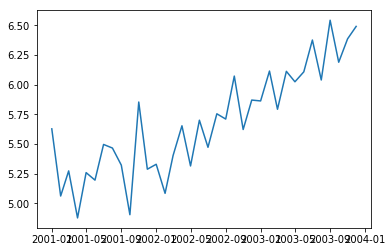

In [40]:
data['log_Sales']=np.log(data['Sales']+12)
A=data['log_Sales']-data['log_Sales'].shift(12)
print(adfuller(A.dropna()))
plt.plot(data['log_Sales'])

In [41]:
import warnings
import itertools
p = d = q = range(0, 3)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(data['log_Sales'],
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:223.20703935801416
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:42.447395791819595
ARIMA(0, 0, 0)x(0, 2, 0, 12)12 - AIC:24.031943746153644
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:26.339810176625935
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:26.136188084941363
ARIMA(0, 0, 0)x(2, 0, 0, 12)12 - AIC:3.387855638522744
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:177.88233317711942
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:40.83290524434179
ARIMA(0, 0, 1)x(0, 2, 0, 12)12 - AIC:21.56720695162758
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:27.127582869718417
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:26.040503762888818
ARIMA(0, 0, 1)x(2, 0, 0, 12)12 - AIC:-6.765295416231357
ARIMA(0, 0, 2)x(0, 0, 0, 12)12 - AIC:143.66957714905953
ARIMA(0, 0, 2)x(0, 1, 0, 12)12 - AIC:35.35658644480937
ARIMA(0, 0, 2)x(0, 2, 0, 12)12 - AIC:20.02096824719402
ARIMA(0, 0, 2)x(1, 0, 0, 12)12 - AIC:28.7167972670057
ARIMA(0, 0, 2)x(1, 1, 0, 12)12 - AIC:21.42500065026657
ARIMA(0, 0, 2)x(2, 0, 0, 12)12 - AIC:-13.540979685220808

ARIMA(2, 2, 0)x(0, 2, 0, 12)12 - AIC:26.767031341120052
ARIMA(2, 2, 0)x(1, 0, 0, 12)12 - AIC:-19.220255326679563
ARIMA(2, 2, 0)x(1, 1, 0, 12)12 - AIC:-3.0622359103448744
ARIMA(2, 2, 0)x(2, 0, 0, 12)12 - AIC:-10.319053676210117
ARIMA(2, 2, 1)x(0, 0, 0, 12)12 - AIC:10.011567503830733
ARIMA(2, 2, 1)x(0, 1, 0, 12)12 - AIC:31.322191198438105
ARIMA(2, 2, 1)x(0, 2, 0, 12)12 - AIC:27.510164624968724
ARIMA(2, 2, 1)x(1, 0, 0, 12)12 - AIC:-20.47371229020401
ARIMA(2, 2, 1)x(1, 1, 0, 12)12 - AIC:-4.56694428011572
ARIMA(2, 2, 1)x(2, 0, 0, 12)12 - AIC:-5.092532228634397
ARIMA(2, 2, 2)x(0, 0, 0, 12)12 - AIC:4.085056664186706
ARIMA(2, 2, 2)x(0, 1, 0, 12)12 - AIC:30.547231344871904
ARIMA(2, 2, 2)x(0, 2, 0, 12)12 - AIC:nan
ARIMA(2, 2, 2)x(1, 0, 0, 12)12 - AIC:-19.141469575887875
ARIMA(2, 2, 2)x(1, 1, 0, 12)12 - AIC:-5.023273031147113
ARIMA(2, 2, 2)x(2, 0, 0, 12)12 - AIC:-10.021403656607788


In [42]:
model=sm.tsa.statespace.SARIMAX(data['log_Sales'],order=(2,0,1),seasonal_order=(1,0,0,12),enforce_stationarity=False,
                                            enforce_invertibility=False)
model_trained=model.fit()

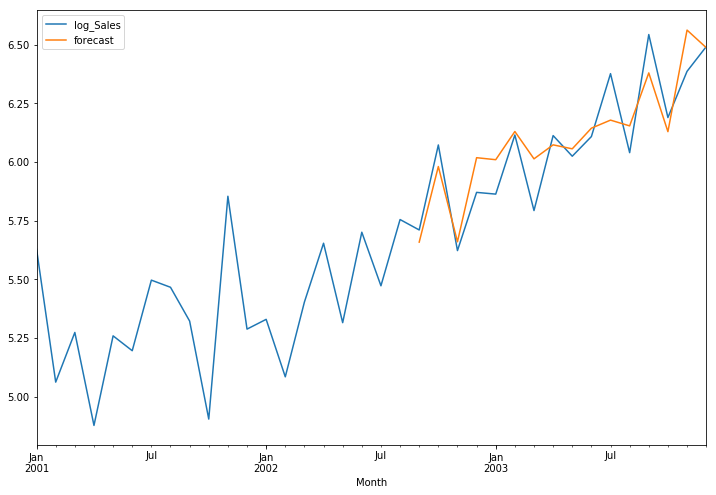

In [43]:
data['forecast']=model_trained.predict(start=20,end=36,dynamic=False)
data[['log_Sales','forecast']].plot(figsize=(12,8))

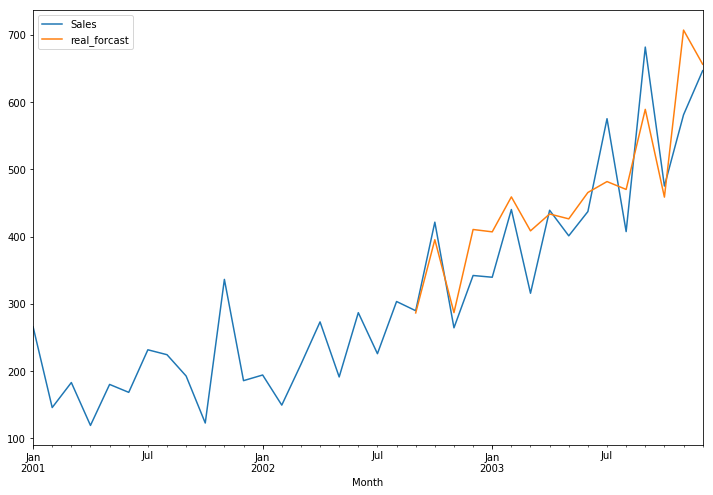

In [44]:
data['real_forcast']=np.exp(data['forecast'])
data[['Sales','real_forcast']].plot(figsize=(12,8))

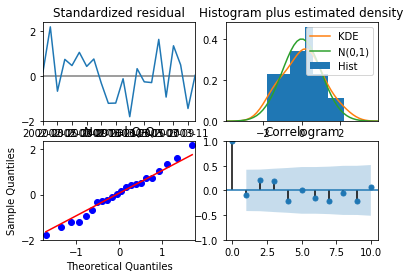

In [45]:
model_trained.plot_diagnostics()
plt.show()